# GRIP @The Sparks Foundation Internship 
# Author : Gouri Zade
## Data Science and Business Analytics Intern
### Task 6 : Prediction using Decision Tree Algorithm
In this task, I will be creating a decision tree classifier on the Iris Data to predict the right class when  we feed new data to this classifier 

# Import the Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
# import the data
data = pd.read_csv('/content/drive/MyDrive/The Sparks Foundation Internship/Task 6= Decision Tree/Iris.csv')

# display the first 5 rows
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Analysis

* **Data Type Info**



In [3]:
# Checking datatypes of features
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

* **Data Shape**

In [4]:
data.shape # 150 rows  # 5 columns

(150, 5)

* **Missing Values**

In [5]:
# Checking missing values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

* **Univariate analysis**

In [6]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualization

* **Identify and Treatment of Outliers**

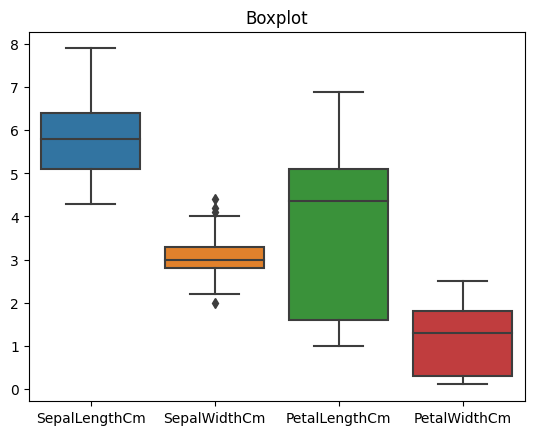

In [7]:
sns.boxplot(data = data)
plt.title('Boxplot')
plt.show()

**Removing Outliers by Winsorizing technique** 

In [8]:
# Create a function to Winsorize a column
def winsorize_column(col, lower_limit, upper_limit):
   # Replaces values outside the lower and upper limits with the limits themselves.
    col = np.where(col < lower_limit, lower_limit, col)
    col = np.where(col > upper_limit, upper_limit, col)
    return col

# Apply Winsorizing to data['SepalWidthCm'] with lower and upper limits
q1 = data['SepalWidthCm'].quantile(0.25)
q3 = data['SepalWidthCm'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - (1.5 *iqr)
upper_limit = q3 + (1.5 *iqr)

data['SepalWidthCm'] = winsorize_column(data['SepalWidthCm'], lower_limit, upper_limit)

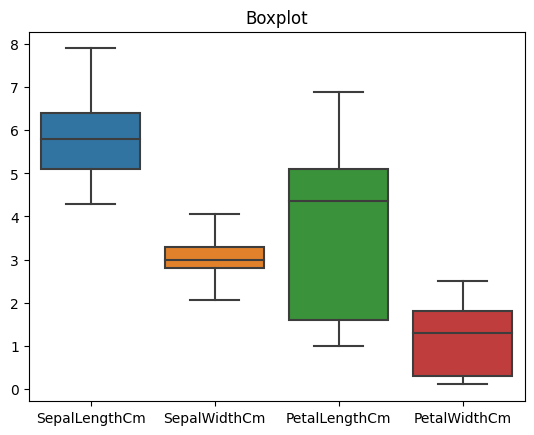

In [9]:
sns.boxplot(data = data)
plt.title('Boxplot')
plt.show()

* **Unique Species**

In [10]:
# Value Count of Species
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Encoding Categorical Data

In [11]:
from sklearn.preprocessing import LabelEncoder

data[['Species']] = data[['Species']].apply(LabelEncoder().fit_transform)
data.head(3) # label in ascending order

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


# Data Partition

In [12]:
# import train test split
from sklearn.model_selection import train_test_split

# differentiate independent and target features
X = data.drop(['Species'], axis = 1)
y = data['Species']

# Splitting the data into train and test sets to use in models
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3 , random_state= 10)

# Decision Tree Model Building

In [13]:
# import decision tree
from sklearn.tree import DecisionTreeClassifier

# apply model
classifier = DecisionTreeClassifier()
output= classifier.fit(X_train, y_train)

In [14]:
independent_variable = list(data.columns[0:4])
independent_variable

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

* **Visualising the trained Model**

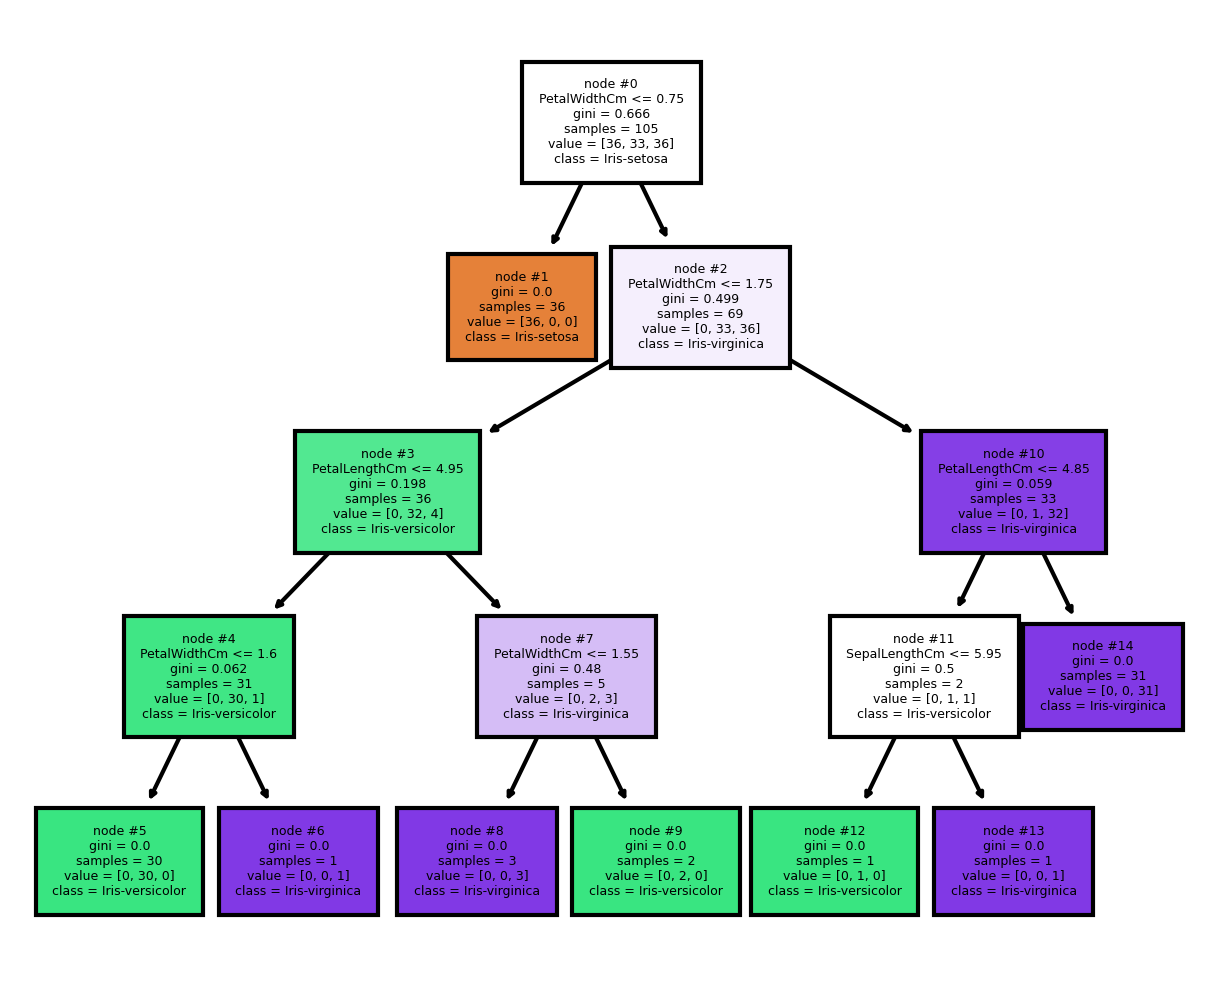

In [15]:
from sklearn import tree
import matplotlib.pyplot as plt

species=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']  
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(output,  # Model 
               feature_names = independent_variable,  # column name
               class_names=species,
               filled = True, # colour
              node_ids=True, # node number
              fontsize=3);

# Predicting the class output for some random values of petal and sepal length and width

In [16]:
print("Class Names = ",species)

# Estimating class probabilities
print()
print("Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. ")
print()
print('Output = ',output.predict([[4.7, 3.2, 1.3, 0.2]]))
print()
print("Our model predicts the class as 0, that is, Iris-setosa.")

Class Names =  ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. 

Output =  [0]

Our model predicts the class as 0, that is, Iris-setosa.
